In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [ ]:
df = pd.read_csv('diamonds_hw.csv')

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___).

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik).

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

## Nomor 1:

### Cari Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#checking the calculation of missing value
df.isnull().any()

carat       True
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [ ]:
#total missing value
mv = df['carat'].isnull().sum()
mv

125

summary : missing value ada di kolom carat dan berjumlah 125 data

### Cek persebaran missing value dan mengkorelasikan dengan outlier

In [ ]:
#check persebaran missing value
mv1 = df[df['carat'].isna()]
mv1

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [ ]:
#PRESENTASE PERBANDINGAN JUMLAH MISSING VALUE DENGAN TOTAL DATA
(df['carat'].isna().sum())/(df.shape[0])*100

0.23173896922506487

SUMMARY :
1. Persebaran missing value cukup menyebar : range index 194-53309
2. Presentase jumlah missing value terhadap total data sangat kecil, yaitu 125 dari 53940 data.




####PERTIMBANGAN :
1. Jika diisi mean/median/modus, persebaran missing value terlalu luas sehingga akan menimbulkan data yang kurang akurat.
2. Jika diisi dengan data diatas/dibawahnya, persebaran nilai "carat" tidak merata (tidak asc atau pun desc), sehingga dapat menimbulkan ketidakakurata data.
3. Bagaimana kalau dihapus?

In [ ]:
df = df.dropna()

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Cara handling missing value paling tepat disini adalah "DELETE DATA". Mengapa?

1. Jumlah missing value sedikit jika dibandingkan total data
2. Index missing value sangat menyebar

Jadi, ketika dihapus, itu juga tidak terlalu mengurangi keakurasian data

##Nomor 2

In [ ]:
pd.DataFrame(df.groupby(['color','clarity'])['clarity'].size())

clarity
color clarity         
D     I1            42
      IF            73
      SI1         2075
      SI2         1369
      VS1          703
      VS2         1692
      VVS1         251
      VVS2         552
E     I1           101
      IF           157
      SI1         2424
      SI2         1711
      VS1         1277
      VS2         2465
      VVS1         654
      VVS2         988
F     I1           143
      IF           385
      SI1         2126
      SI2         1602
      VS1         1360
      VS2         2199
      VVS1         732
      VVS2         972
G     I1           150
      IF           680
      SI1         1973
      SI2         1546
      VS1         2142
      VS2         2342
      VVS1         998
      VVS2        1441
H     I1           162
      IF           297
      SI1         2261
      SI2         1561
      VS1         1166
      VS2         1640
      VVS1         584
      VVS2         608
I     I1            92
      IF           142
      SI1         1422
      SI2          910
      VS1          959
      VS2         1167
      VVS1         354
      VVS2         365
J     I1            50
      IF            51
      SI1          747
      SI2          479
      VS1          539
      VS2          729
      VVS1          74
      VVS2         131

##Nomor 3

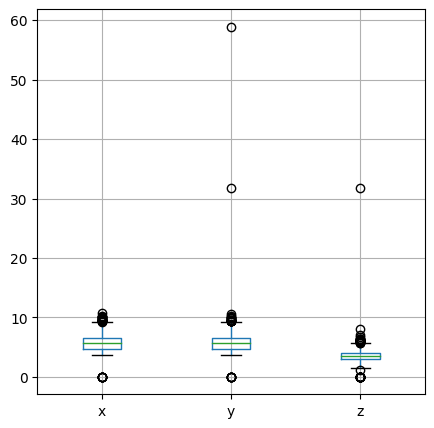

In [ ]:
#detect outlier

plt.figure(figsize=(5,5))
df.boxplot(column=['x','y','z'])
plt.show()

In [ ]:
#batas bawah
lower_limit_x = df['x'].quantile(0.05)
lower_limit_x

4.29

In [ ]:
lower_limit_y = df['y'].quantile(0.05)
lower_limit_y

4.3

In [ ]:
lower_limit_z = df['z'].quantile(0.05)
lower_limit_z

2.65

In [ ]:
upper_limit_x = df['x'].quantile(0.95)
upper_limit_x

7.662999999999957

In [ ]:
upper_limit_y = df['y'].quantile(0.95)
upper_limit_y

7.65

In [ ]:
upper_limit_z = df['z'].quantile(0.95)
upper_limit_z

4.73

In [ ]:

ol = df[(df['x']>upper_limit_x) | (df['x']<lower_limit_x) & (df['y']>upper_limit_y) | (df['y']<lower_limit_y) & (df['z']>upper_limit_z) | (df['z']<lower_limit_z)]
ol

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53617,0.30,Very Good,D,SI1,61.0,61.0,552,4.27,4.29,2.61
53627,0.30,Very Good,D,SI1,61.3,60.0,552,4.26,4.32,2.63
53630,0.30,Very Good,D,SI1,60.6,60.0,552,4.30,4.32,2.61
53632,0.30,Premium,I,VVS1,61.1,59.0,552,4.31,4.33,2.64


In [ ]:
#jumlah outlier
ol.shape[0]

5093